### Project Website: https://mohamedirfansh.github.io/Airbnb-Data-Science-Project/

## Importing Essential Libraries
Other than the essential libraries that were learnt and used in the labs such as Numpy, Pandas, Seaborn and the various sklearn functions, other libraries that were used in this portion of the project includes the libraries needed for regression modelling as well as for model analysis such as:
- XGBoost Library: https://xgboost.readthedocs.io/en/latest/build.html
- CatBoost: https://catboost.ai/docs/concepts/python-installation.html
- RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- Ridge Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
- Lasso Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
- TreeInterpreter: https://pypi.org/project/treeinterpreter/

In [124]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

## Importing Dataset

The dataset,  which is in csv format, is named 'listings.csv'. Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:
- Room Type
- Property Type
- Number of Bedrooms
- Amenities
- Number of Reviews

As such, we single out these variables (together with price) to form a new dataframe.

In [125]:
listingDF = pd.read_csv('datasets/listings.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
newListingsDF = listingDF[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
newListingsDF

,room_type,property_type,bedrooms,amenities,number_of_reviews,price
0,Private room,Private room in rental unit,NaN,"[""Essentials"", ""Iron"", ""Hangers"", ""Host greets...",12,$100.00
1,Entire home/apt,Entire rental unit,1.0,"[""Essentials"", ""Iron"", ""Hangers"", ""Dishes and ...",25,$150.00
2,Entire home/apt,Entire condo,1.0,"[""Heating"", ""TV"", ""Air conditioning"", ""Kitchen...",4,$100.00
3,Entire home/apt,Entire rental unit,2.0,"[""Essentials"", ""Iron"", ""Hangers"", ""TV with sta...",41,$80.00
4,Entire home/apt,Entire rental unit,2.0,"[""Hangers"", ""Coffee maker"", ""Smoking allowed"",...",30,$90.00
...,...,...,...,...,...,...
23137,Entire home/apt,Entire rental unit,1.0,"[""Hangers"", ""Hot water kettle"", ""Clothing stor...",0,$61.00
23138,Entire home/apt,Entire rental unit,1.0,"[""Hangers"", ""Outdoor dining area"", ""Long term ...",0,$89.00
23139,Entire home/apt,Entire rental unit,3.0,"[""Hangers"", ""Portable fans"", ""Shower gel"", ""Cl...",0,$300.00
23140,Entire home/apt,Entire rental unit,2.0,"[""Hangers"", ""Clothing storage: closet and dres...",0,$289.00


## Data-Cleaning

Data Cleaning is done to remove the irrelevant/insignificant parts of the data, modify the data for easy manipulation and correcting them so as to prepare them for modelling.


###  Amenities
- Displays the different types of amenities available for each listing

To clean the data in this variable: 
- Checking and listing down all the different amenities that were offered
- Separating the different amenities and creating a dedicated column for each amenity
- Removing amenities which have NULL values for all listings

In [ ]:
# Creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [ ]:
# Creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/tmp/ipykernel_22882/631897346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
/tmp/ipykernel_22882/631897346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
/tmp/ipykernel_22882/631897346.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

/tmp/ipykernel_22882/937827799.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.drop('amenities', axis=1, inplace=True)


In [ ]:
# Removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23142 entries, 0 to 23141
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              23142 non-null  object 
 1   property_type          23142 non-null  object 
 2   bedrooms               17825 non-null  float64
 3   number_of_reviews      23142 non-null  int64  
 4   price                  23142 non-null  object 
 5   air_conditioning       14086 non-null  float64
 6   high_end_electronics   2269 non-null   float64
 7   bbq                    348 non-null    float64
 8   balcony                2434 non-null   float64
 9   nature_and_views       155 non-null    float64
 10  bed_linen              14252 non-null  float64
 11  breakfast              2570 non-null   float64
 12  tv                     18800 non-null  float64
 13  coffee_machine         12575 non-null  float64
 14  cooking_basics         14213 non-null  float64
 15  wh

### Property Type
- Displays the property type of a listing

To clean the data in this variable: 
- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 30

In [ ]:
newListingsDF.head()

,room_type,property_type,bedrooms,number_of_reviews,price,air_conditioning,high_end_electronics,bbq,balcony,nature_and_views,...,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,pets_allowed,private_entrance,secure,self_check_in,smoking_allowed
0,Private room,Private room in rental unit,NaN,12,$100.00,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Entire home/apt,Entire rental unit,1.0,25,$150.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,Entire home/apt,Entire condo,1.0,4,$100.00,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,Entire home/apt,Entire rental unit,2.0,41,$80.00,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
4,Entire home/apt,Entire rental unit,2.0,30,$90.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# Checking to see the total number of each type of property 
newListingsDF.property_type.value_counts()

property_type
Entire rental unit                    12081
Entire condo                           5004
Private room in rental unit            2440
Private room in condo                   969
Entire loft                             823
Entire home                             356
Entire serviced apartment               232
Private room in home                    181
Shared room in rental unit              156
Private room in bed and breakfast       145
Entire vacation home                    142
Private room in loft                     85
Room in boutique hotel                   57
Room in hotel                            47
Shared room in condo                     39
Private room in villa                    32
Shared room in hostel                    32
Tiny home                                23
Private room in vacation home            22
Entire guest suite                       20
Entire townhouse                         20
Entire villa                             20
Entire place      

In [ ]:
# Grouping property types with less than <30 count into 'Other'
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts()

property_type
Other    23142
Name: count, dtype: int64

### Price
- Displays the price/cost of a listing

To clean the data in this variable: 
- Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer 

In [ ]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23142 entries, 0 to 23141
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              23142 non-null  object 
 1   property_type          23142 non-null  object 
 2   bedrooms               17825 non-null  float64
 3   number_of_reviews      23142 non-null  int64  
 4   price                  23142 non-null  int64  
 5   air_conditioning       14086 non-null  float64
 6   high_end_electronics   2269 non-null   float64
 7   bbq                    348 non-null    float64
 8   balcony                2434 non-null   float64
 9   nature_and_views       155 non-null    float64
 10  bed_linen              14252 non-null  float64
 11  breakfast              2570 non-null   float64
 12  tv                     18800 non-null  float64
 13  coffee_machine         12575 non-null  float64
 14  cooking_basics         14213 non-null  float64
 15  wh

/tmp/ipykernel_22882/1923169659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.price = newListingsDF.price.str[1:-3]
/tmp/ipykernel_22882/1923169659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.price = newListingsDF.price.str.replace(",", "")
/tmp/ipykernel_22882/1923169659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Ensuring that there are no NULL entries in the data

In [ ]:
# To convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
air_conditioning         0
high_end_electronics     0
bbq                      0
balcony                  0
nature_and_views         0
bed_linen                0
breakfast                0
tv                       0
coffee_machine           0
cooking_basics           0
white_goods              0
elevator                 0
gym                      0
child_friendly           0
parking                  0
outdoor_space            0
host_greeting            0
hot_tub_sauna_or_pool    0
internet                 0
long_term_stays          0
pets_allowed             0
private_entrance         0
secure                   0
self_check_in            0
smoking_allowed          0
dtype: int64

## Regression Models

Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as preidction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.
> - **Predictor Variables**: Room_type, Property_type, Bedrooms, Number_of_Reviews, Amenities
> - **Response Variable**: Price

The following regression models will be carried out:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression
- XGBoost
- CatBoost

### Data Preparation
The following will be done to the data to ensure its fit into the different regression models:
- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [ ]:
# One-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23142 entries, 0 to 23141
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bedrooms                   23142 non-null  float64
 1   number_of_reviews          23142 non-null  int64  
 2   price                      23142 non-null  int64  
 3   air_conditioning           23142 non-null  float64
 4   high_end_electronics       23142 non-null  float64
 5   bbq                        23142 non-null  float64
 6   balcony                    23142 non-null  float64
 7   nature_and_views           23142 non-null  float64
 8   bed_linen                  23142 non-null  float64
 9   breakfast                  23142 non-null  float64
 10  tv                         23142 non-null  float64
 11  coffee_machine             23142 non-null  float64
 12  cooking_basics             23142 non-null  float64
 13  white_goods                23142 non-null  flo

In [ ]:
# Separating X and y for Modelling



# :FIXME  ste kdzes , avelcra es zxtiknery
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room",
                              "property_type_Other"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [ ]:
def rle(arr):
    # Sort the array in descending order
    sorted_arr = np.sort(arr)[::-1]
    
    # Remove the 5 largest elements
    new_arr = sorted_arr[5:]
    
    return new_arr

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
# y_train = remove_largest_elements(y_train)
# X_train = remove_largest_elements(X_train)
# X_test = remove_largest_elements(X_test)
# y_test = remove_largest_elements(y_test)

### Model 1: Linear Regression
Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables). 

It then tries to find a linear relationship between the variables and predicts the price based on the linear line. 

Here, we have trained the model to follow the following formula:
> Regression Problem : Price = $a$ $\times$ (Predictor Variables) + $b$

The above is a general formula, however, since we have multiple predictor variables, there will be more than 1 coefficient (one for each predictor variable). 

In [ ]:
# Creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [178.25097755]

                   Predictors  Coefficients
0                    bedrooms     82.402634
1                   breakfast     -2.688956
2                          tv     15.884554
3                 white_goods     -2.876399
4                    elevator    -14.637452
5                         gym     11.536962
6       hot_tub_sauna_or_pool      1.101631
7                    internet      4.260141
8                pets_allowed    -10.548988
9                      secure      1.983372
10          number_of_reviews    -21.429967
11  room_type_Entire_home_apt    -45.969823
12     room_type_Private_room    -26.405056
13      room_type_Shared_room     -9.580143
14        property_type_Other      0.000000



**Note that**:
A positive coefficient indicates that as the predictor variable increases, the response variable also increases. 
A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [ ]:
# Predict Response corresponding to Predictors

trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

In [ ]:
print(len(X_train.columns))
# Predict Response corresponding to Predictors
print(type(testPredictionLR))



15
<class 'numpy.ndarray'>


In [ ]:
# y_train = remove_largest_elements(y_train)

print(type(y_train))
print(len(testPredictionLR))

<class 'pandas.core.frame.DataFrame'>
4629


Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

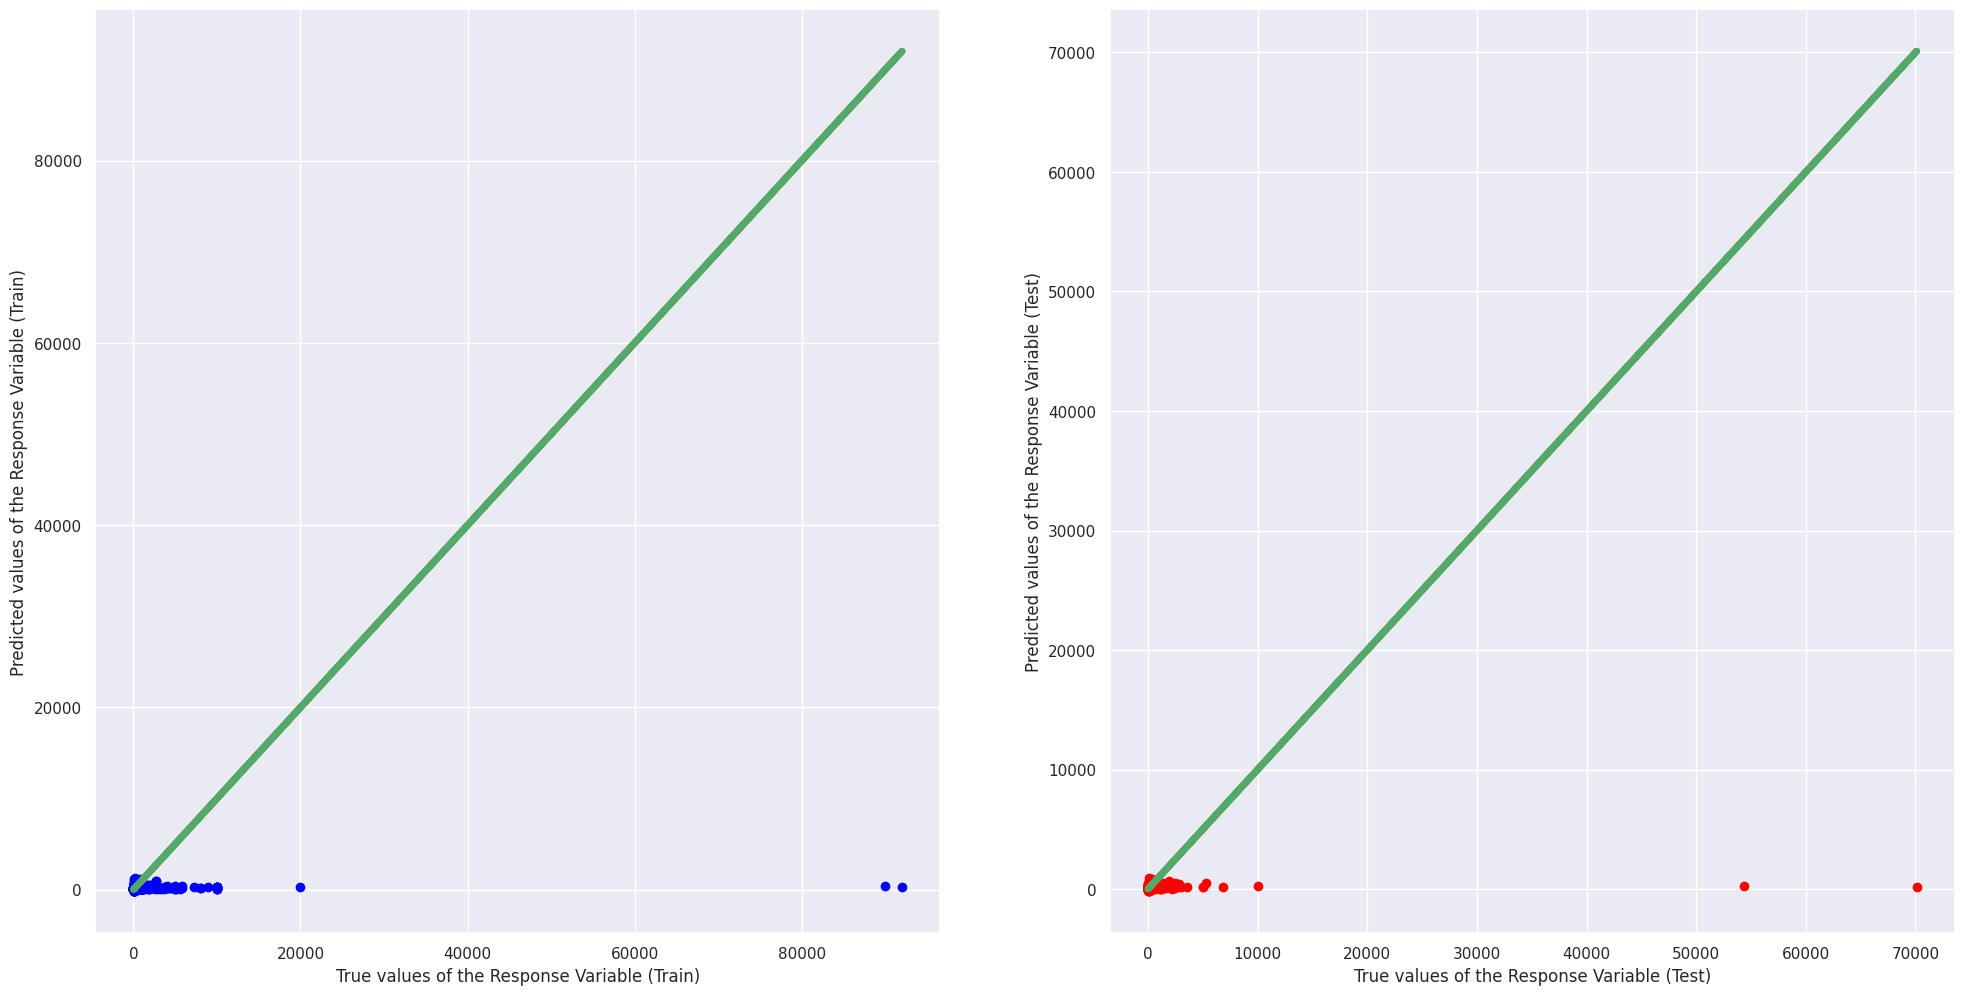

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 2: Ridge Regression


Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

Ridge Regression is good at handling overfitting.

The difference in the equation for Ridge Regression is that it penalize RSS by adding another term and search for the minimization.

We can iterate different $\lambda$ values as the additional term to find the best fit for a Ridge Regression model.

Ridge Regression does not drop any predictors unlike Lasso Regression, which is we will observe later on that the beta estimate will only converge to zero, but never reach zero.



In [ ]:
#numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
"internet", "pets_allowed", "secure", "number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private room", "room_type_Shared_room",
                              "property_type_Other",])

In [ ]:
# initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value
#store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
print(len(varArr))
print(len(ridgeReg.coef_.ravel()))
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})


lambdas = np.arange(0,2000,1) #lambda value of 0 to positive 2000, in intervals of 1

for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()


bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])


#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

15
15


/tmp/ipykernel_22882/1901908018.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/tmp/ipykernel_22882/1901908018.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
/tmp/ipykernel_22882/1901908018.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

KeyboardInterrupt: 

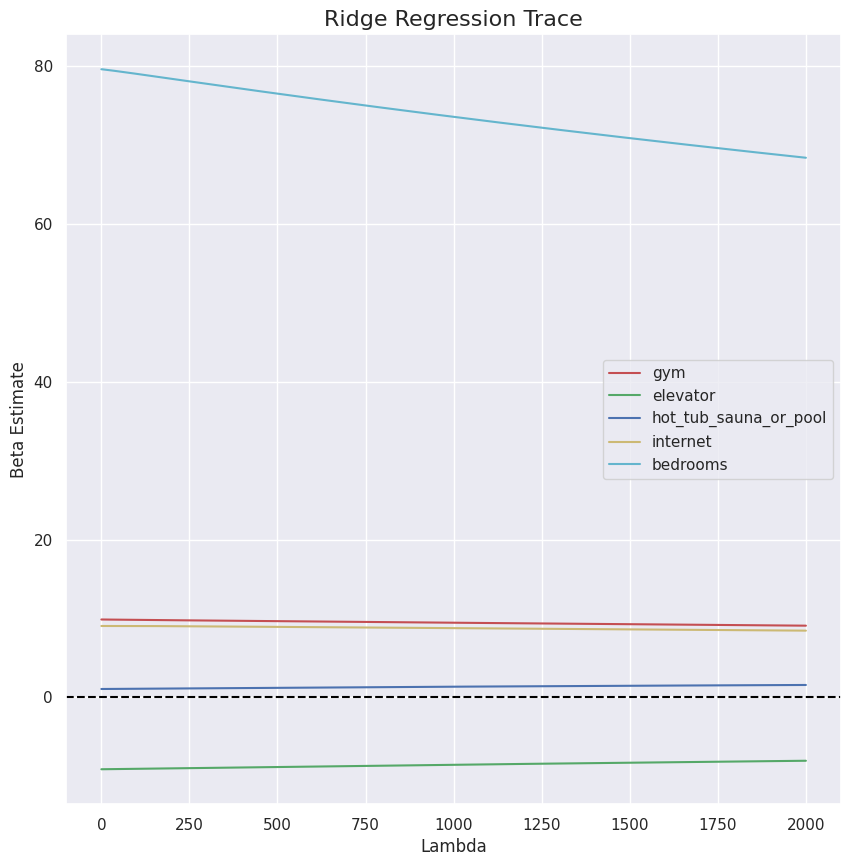

In [ ]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.gym,'r',ridgeDF.elevator,'g',ridgeDF.hot_tub_sauna_or_pool,'b',ridgeDF.internet,'y',ridgeDF.bedrooms,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

From this graph, we can see that the most important predictor among the 5 is <code>bedrooms</code>. For Ridge Regression, the beta estimate of each predictor will converge to zero (but will never reach zero) as lambda increases, the faster it converges to zero, the less important the predictor is. For this case, the most important predictor is <code>bedrooms</code>. The reason why the beta estimate does not reach zero is because Ridge Regression does not drop any predictors, unlike Lasso Regression, which we will observe later on.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

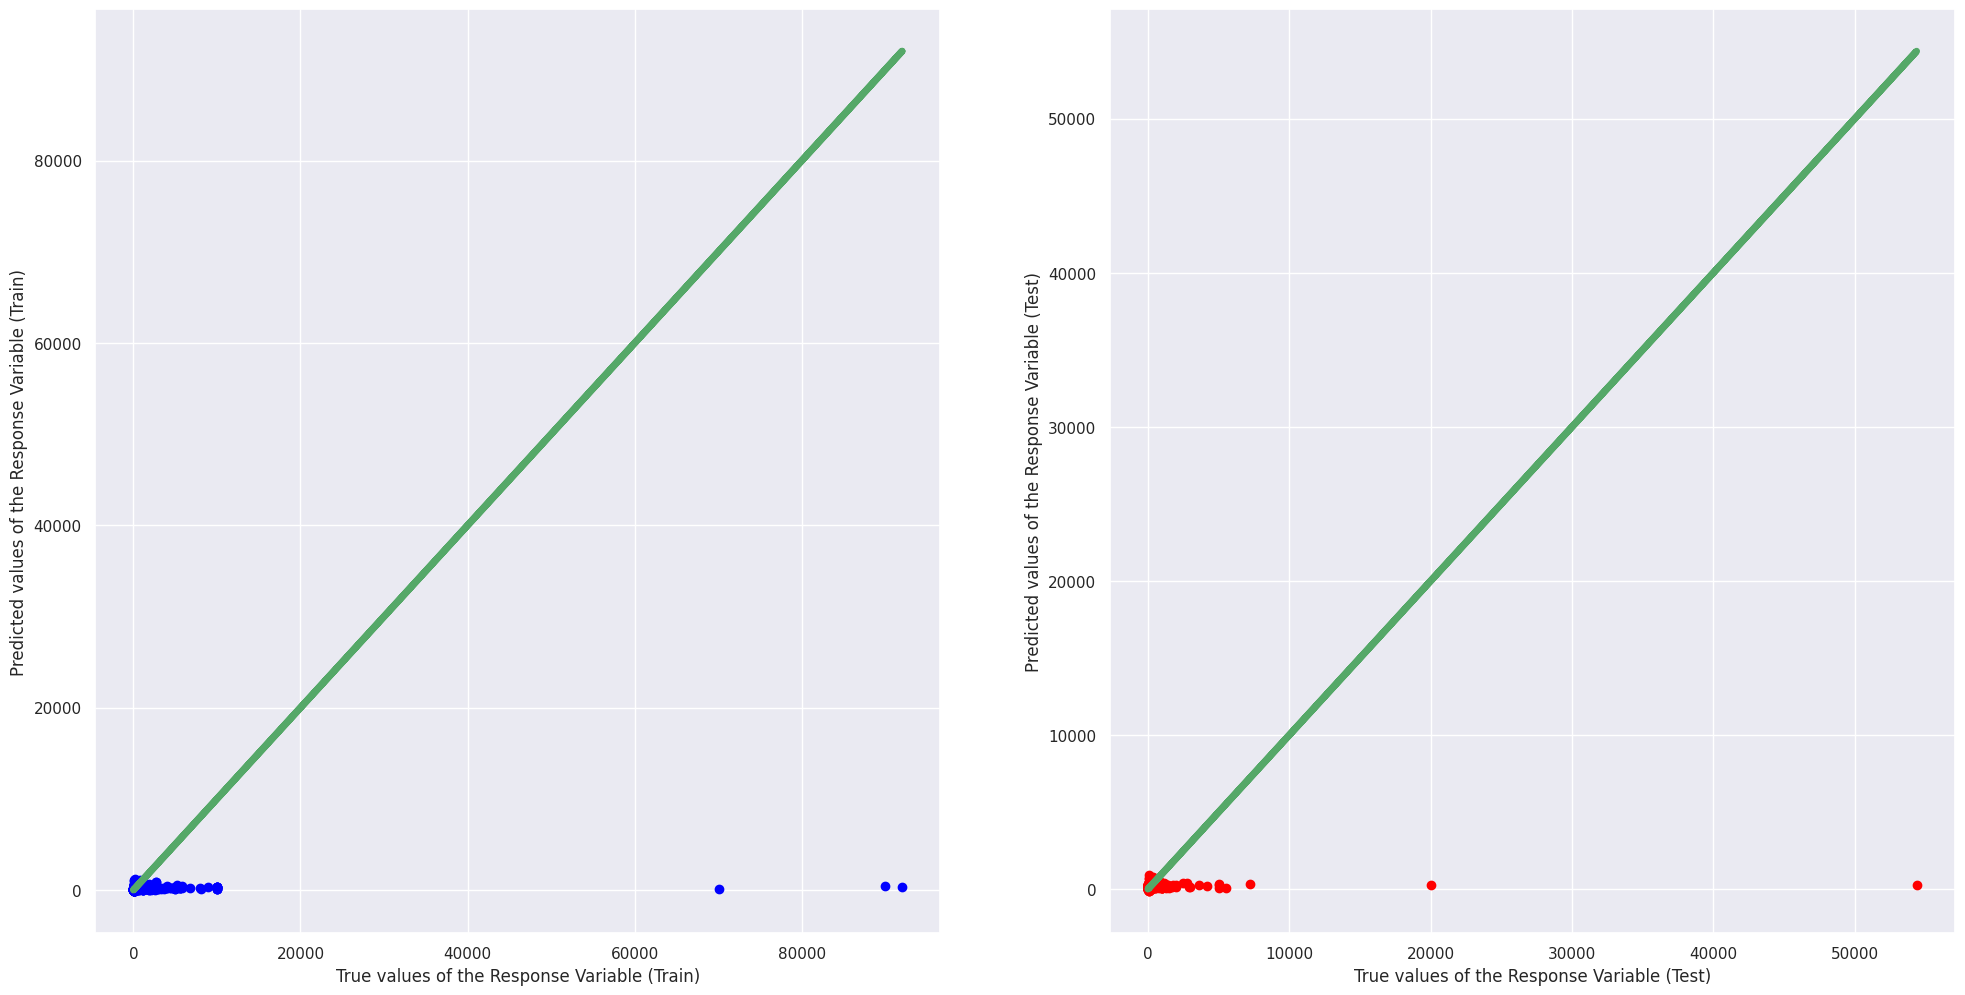

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionRidge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionRidge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Ridge Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 3: Lasso Regression

Lasso Regression is similar to Ridge Regression, meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasson Regression also requires a $\lambda$ value to be iterated to find the best fit.


In [ ]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

/tmp/ipykernel_22882/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/tmp/ipykernel_22882/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/tmp/ipykernel_22882/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented

The highest R2 value:  0.005101383397706716


/tmp/ipykernel_22882/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
/tmp/ipykernel_22882/2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()


variable,1,bedrooms,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,number_of_reviews,room_type_Entire_home_apt,room_type_Private room,room_type_Shared_room,property_type_Other
0,estimate,77.636467,-3.768245,14.588877,-1.467964,-8.039302,9.018306,0.228096,8.088036,-9.894152,2.154356,-17.995188,-12.493852,0.000000,-0.930728,0.0
1,estimate0.01,79.609123,-4.866056,15.823704,-2.592691,-9.104354,9.858343,1.049864,9.038056,-10.901158,3.028391,-18.950620,-41.371475,-25.853052,-9.112292,0.0
2,estimate0.03,79.601962,-4.840062,15.806042,-2.584271,-9.083827,9.838633,1.031248,9.024156,-10.879511,3.022616,-18.934589,-36.797147,-21.392475,-7.879269,0.0
3,estimate0.049999999999999996,79.594801,-4.814070,15.788380,-2.575849,-9.063301,9.818923,1.012632,9.010255,-10.857863,3.016840,-18.918557,-32.223281,-16.932346,-6.646368,0.0
4,estimate0.06999999999999999,79.587639,-4.788077,15.770718,-2.567428,-9.042774,9.799214,0.994016,8.996355,-10.836216,3.011065,-18.902526,-27.649012,-12.471826,-5.413360,0.0


/tmp/ipykernel_22882/2144987329.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(-1, 100, 1))


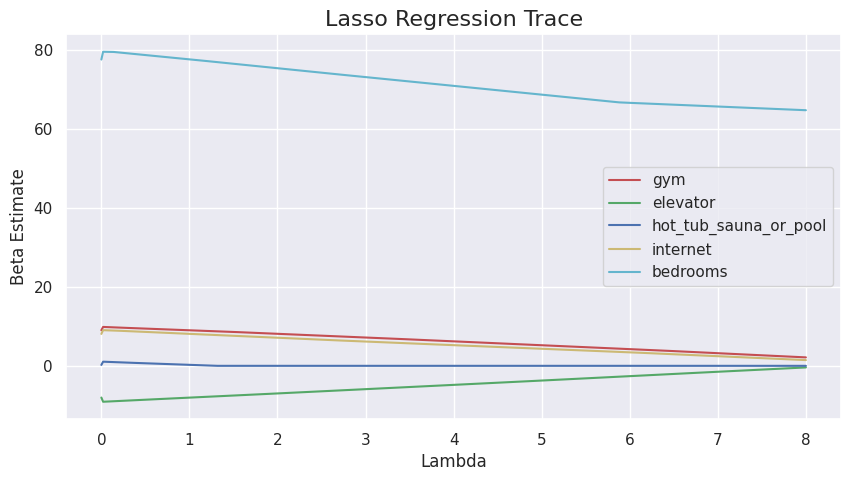

In [ ]:
#Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lassoDF.gym,'r',lassoDF.elevator,'g',lassoDF.hot_tub_sauna_or_pool,'b',lassoDF.internet,'y',lassoDF.bedrooms,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)


From this graph, we can see that the most important predictor among the 5 is also <code>bedrooms</code>. For Lasso Regression, the faster the beta estimate of the predictor reaches zero (the predictor has been dropped) as lambda increases, the less important the predictor is. As we can see from the graph, <code>bedrooms</code> does not even hit zero after when has reached its highest value of 8, compared to the beta estimate of <code>hot_tub_sauna_or_pool</code> which reached zero a lot faster than <code>bedrooms</code>.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

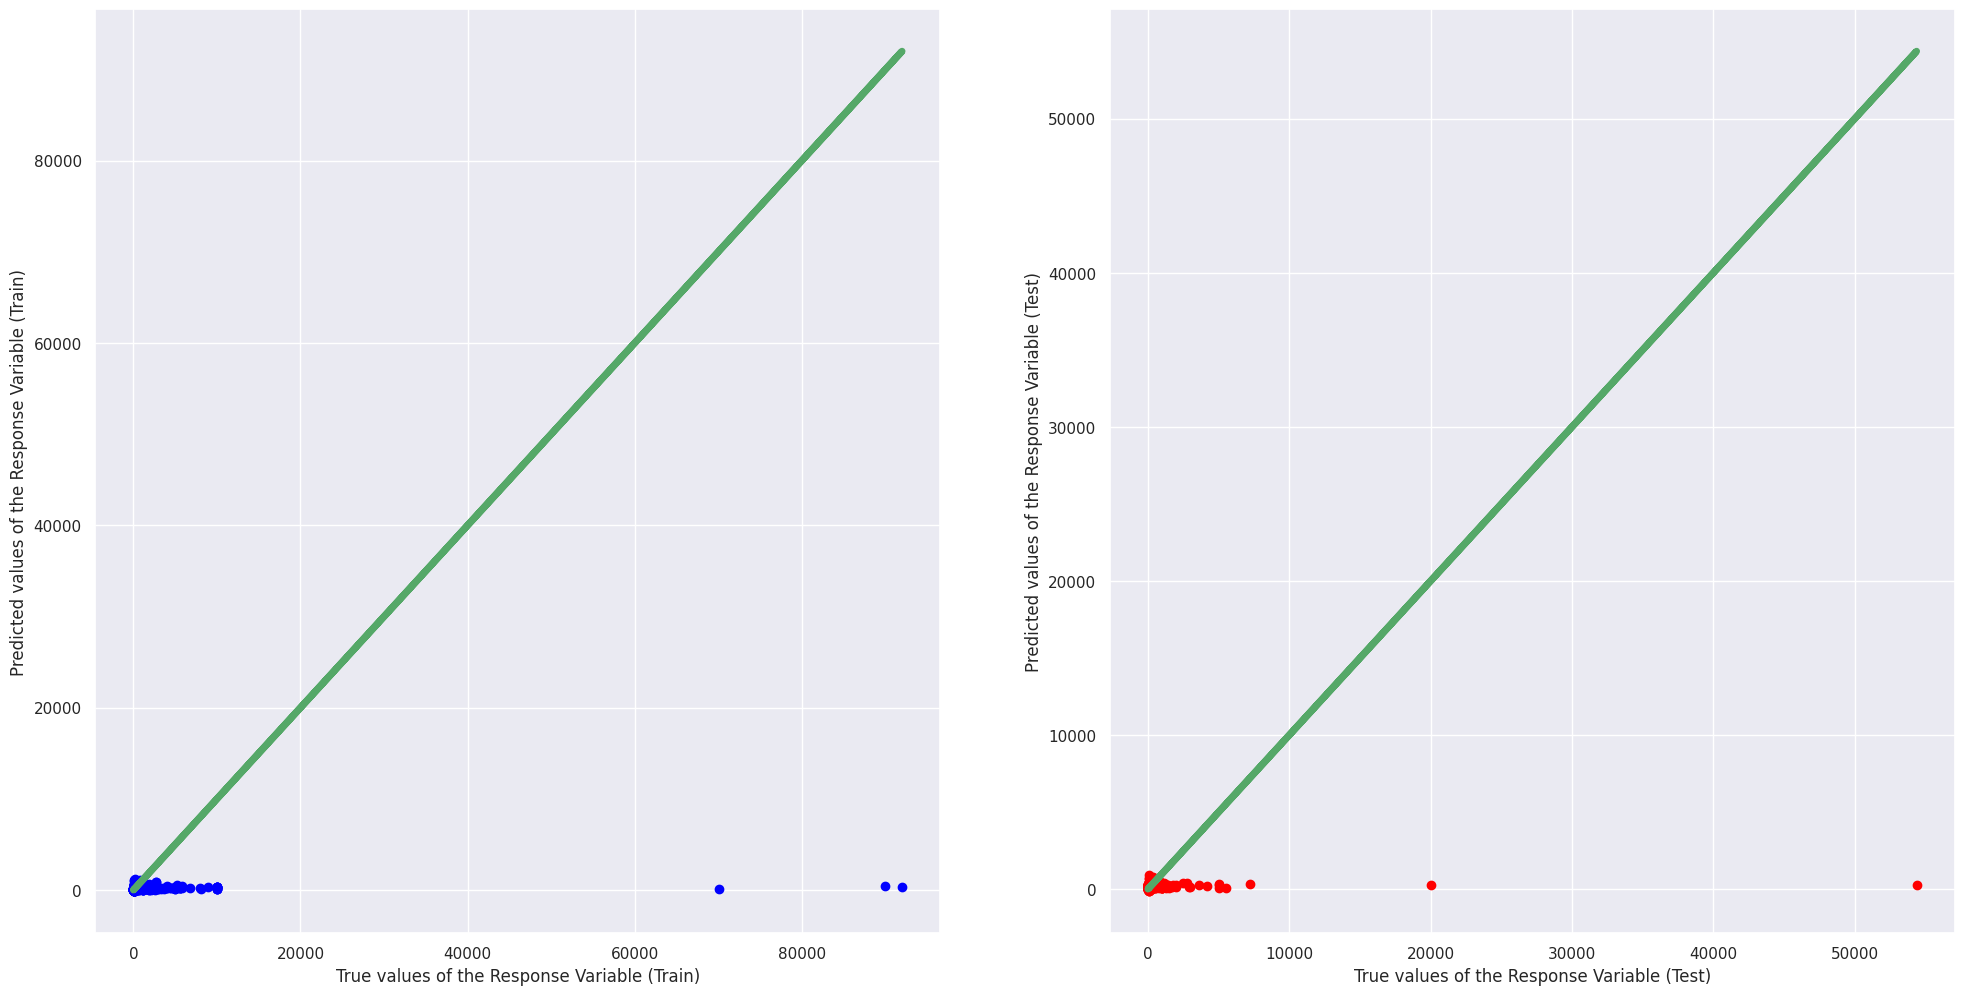

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Lasso Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 4: Random Forest Regression

Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees. 

Here, we use the RandomForestRegressor to help predict the price.

In [ ]:
# Tuning of Parameters

# random_grid = {'n_estimators': [2000],
#                'max_features': [2,5],
#                'max_depth': [40,70],
#                'min_samples_split': [40,50],
#                'max_leaf_nodes':[50,70],
#                'max_features': [2,5]}
# rf_tune = RandomForestRegressor()
# rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

# rf_random.fit(X_train,y_train)

# print(rf_random.best_estimator_)

To optimize the parameters used in the Random Forest Regression modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=5, max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
# Creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# Predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

,Weight
property_type_Other,0.000000
room_type_Shared_room,0.001177
secure,0.006230
hot_tub_sauna_or_pool,0.007847
breakfast,0.009040
room_type_Private_room,0.011443
internet,0.017392
room_type_Entire_home_apt,0.017850
white_goods,0.019366
tv,0.021227


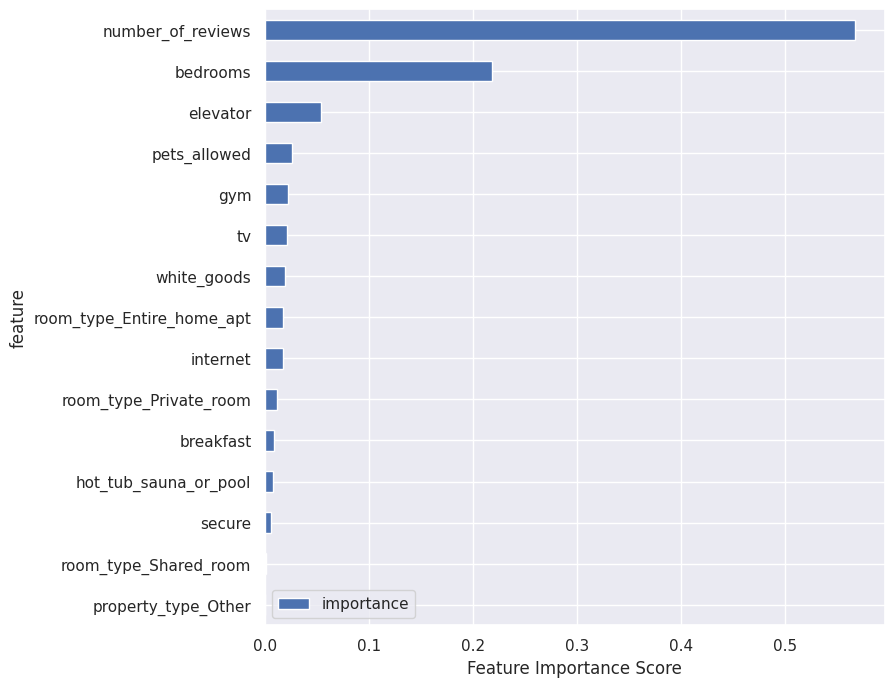

In [ ]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Importance provides a score that indicates how useful or valuable each feature was in the construction of the decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a taller bar means that the variable has a higher importance in the Random Tree Regression Model in predicting price. 

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

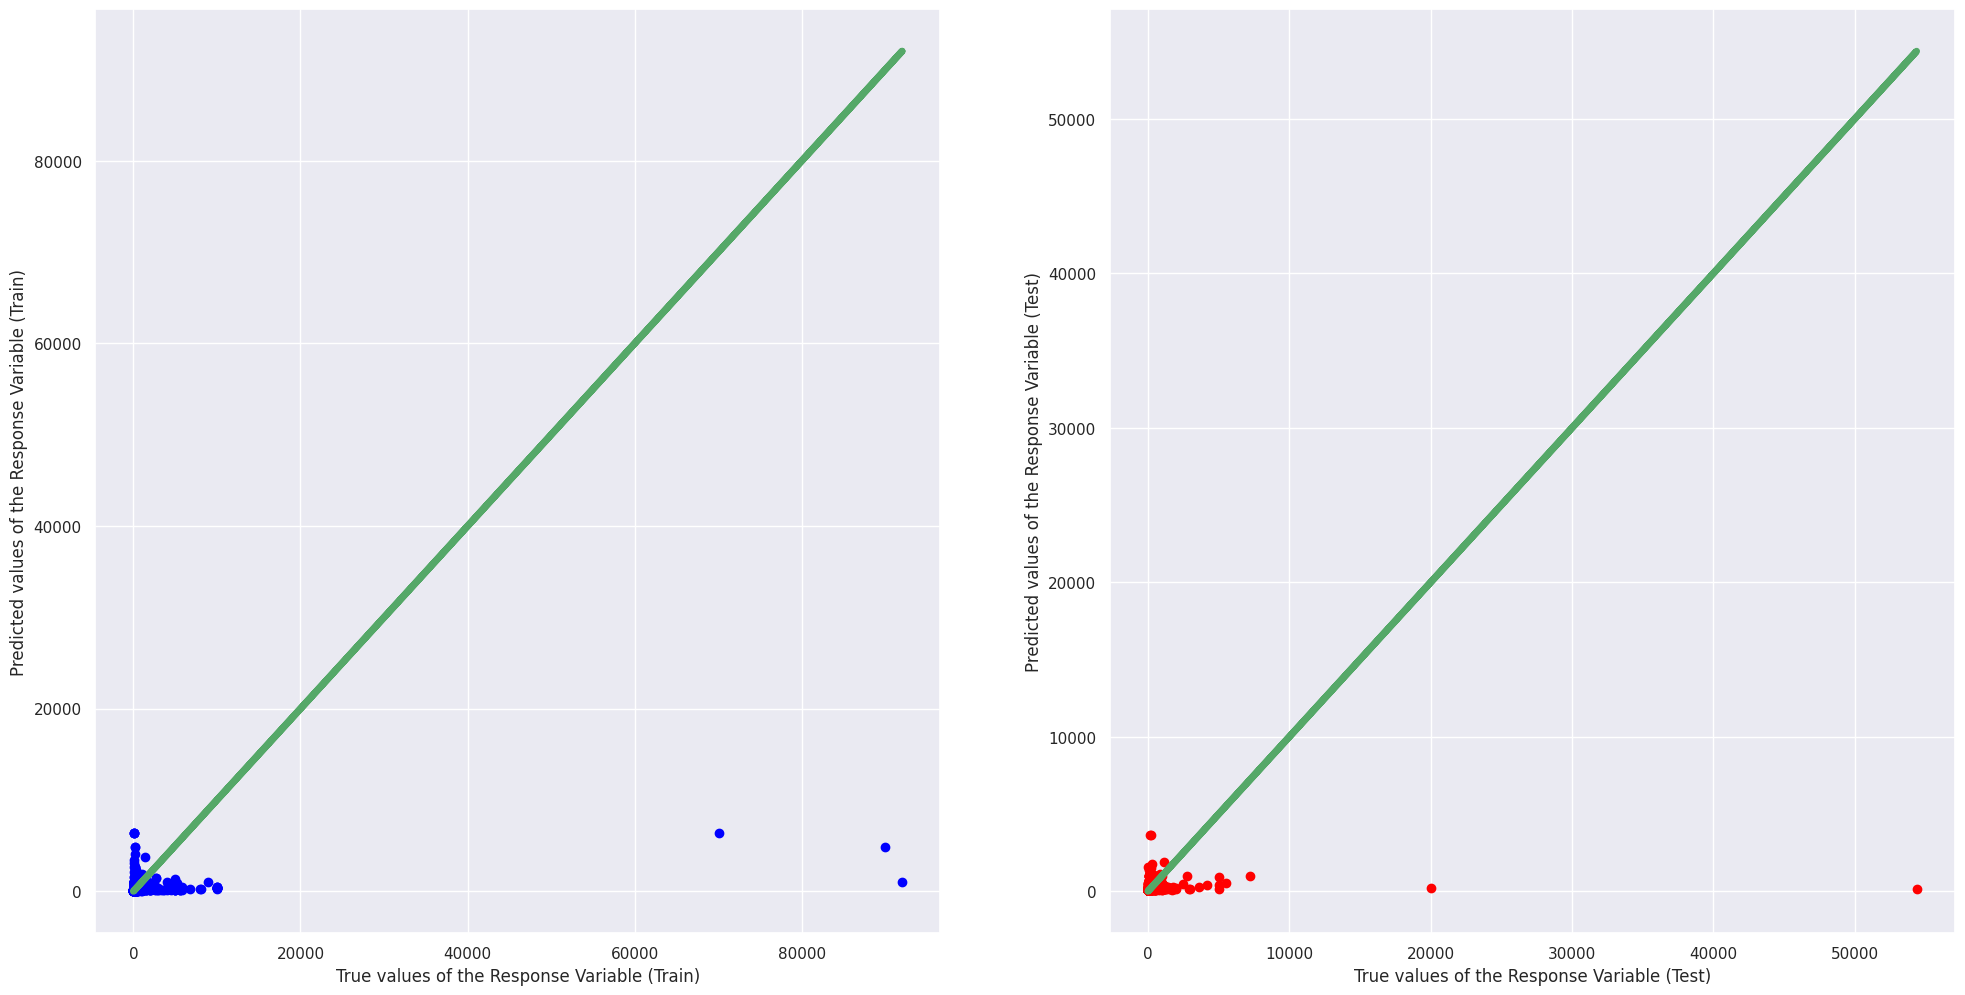

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Random Forest Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 5 : XGBoost

XGBoost is an open source library that provides a high-performance implementation of gradient boost decision trees (similar to the decision trees that we have learnt). It is a machine learning model that is able to perform prediction tasks regardless of Regression or Classification. 

The key idea of Gradient Boosted Decision Trees is that they build a series of trees in which each tree is trained so that it attempts to correct the mistakes of the previous tree in the seroes.

In [ ]:
#Tuning the Parameters

# parameters_for_testing = {
#     'colsample_bytree':[0.3,0.5],
#     'learning_rate':[0.1,0.5],
#     'alpha': [10,12],
#     'max_depth':[3,5],
#     'n_estimators':[2000],  
# }

                    
# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#      gamma=0, colsample_bytree=0.8)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(X_train,y_train)

# print(gsearch1.best_estimator_)

To optimize the parameters used in the XGBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

# Predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

/home/user/.local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [01:02:55] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


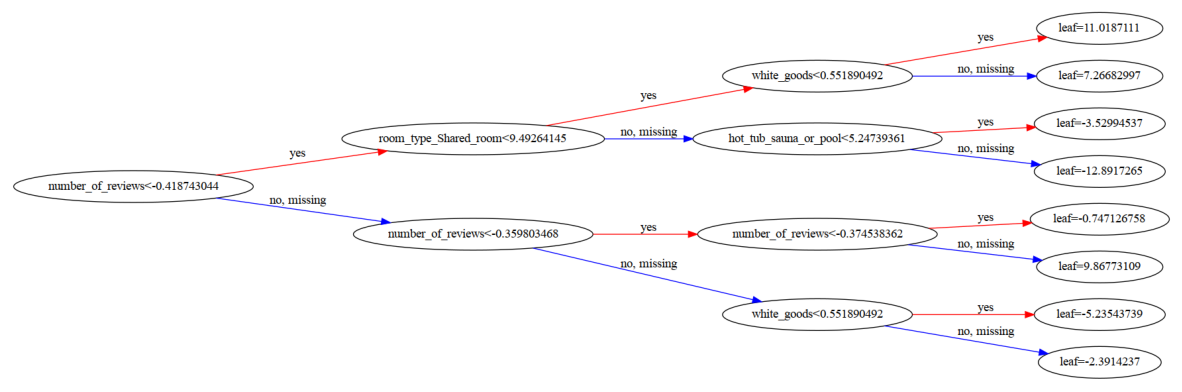

In [ ]:
# Ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [ ]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
property_type_Other,0.000000
room_type_Shared_room,0.004361
hot_tub_sauna_or_pool,0.011057
breakfast,0.015567
secure,0.026796
gym,0.029057
tv,0.030710
internet,0.036193
room_type_Private_room,0.042075
room_type_Entire_home_apt,0.053002


Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the table above, the predictor variable that is associated with a higher number means that the variable has a higher importance in the XGBoost Regression Model in predicting price. 

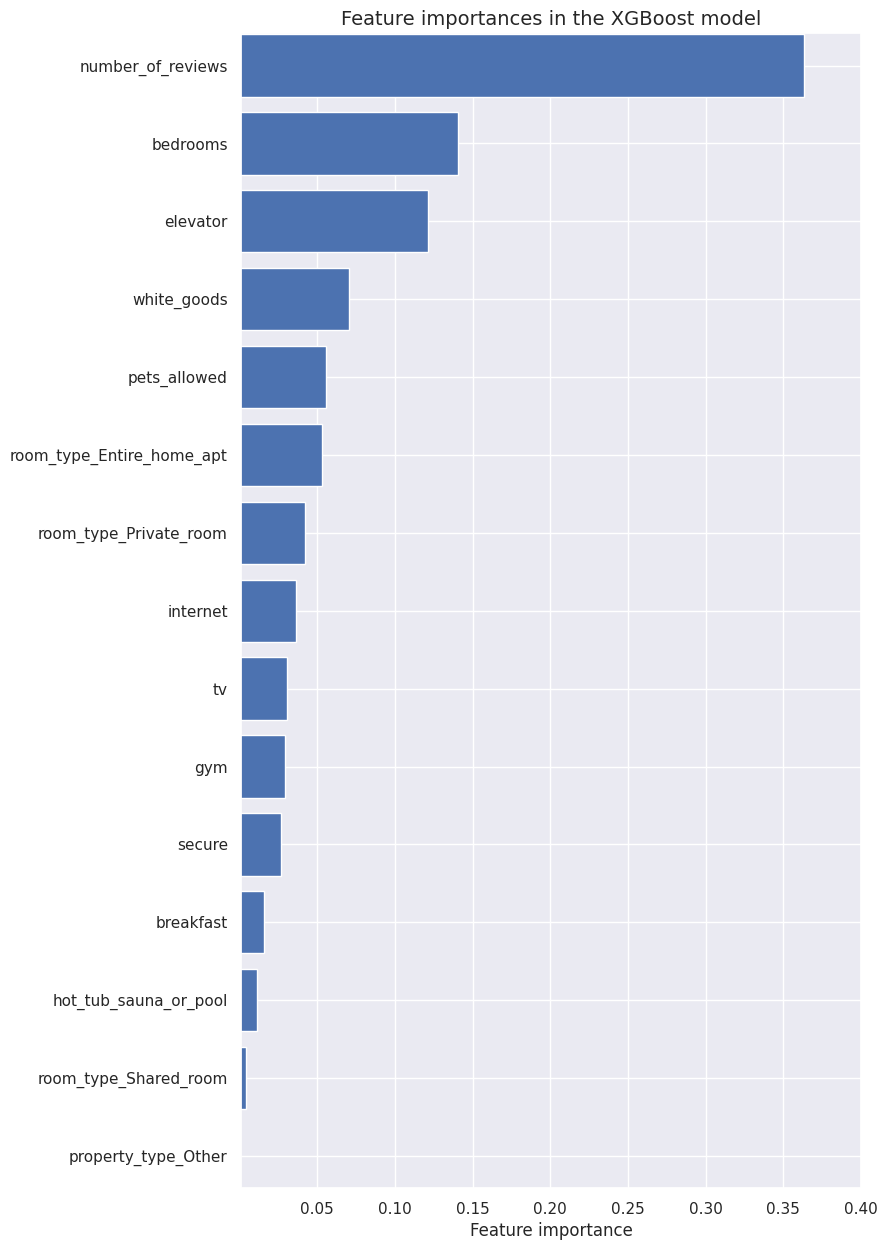

In [ ]:
# Plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

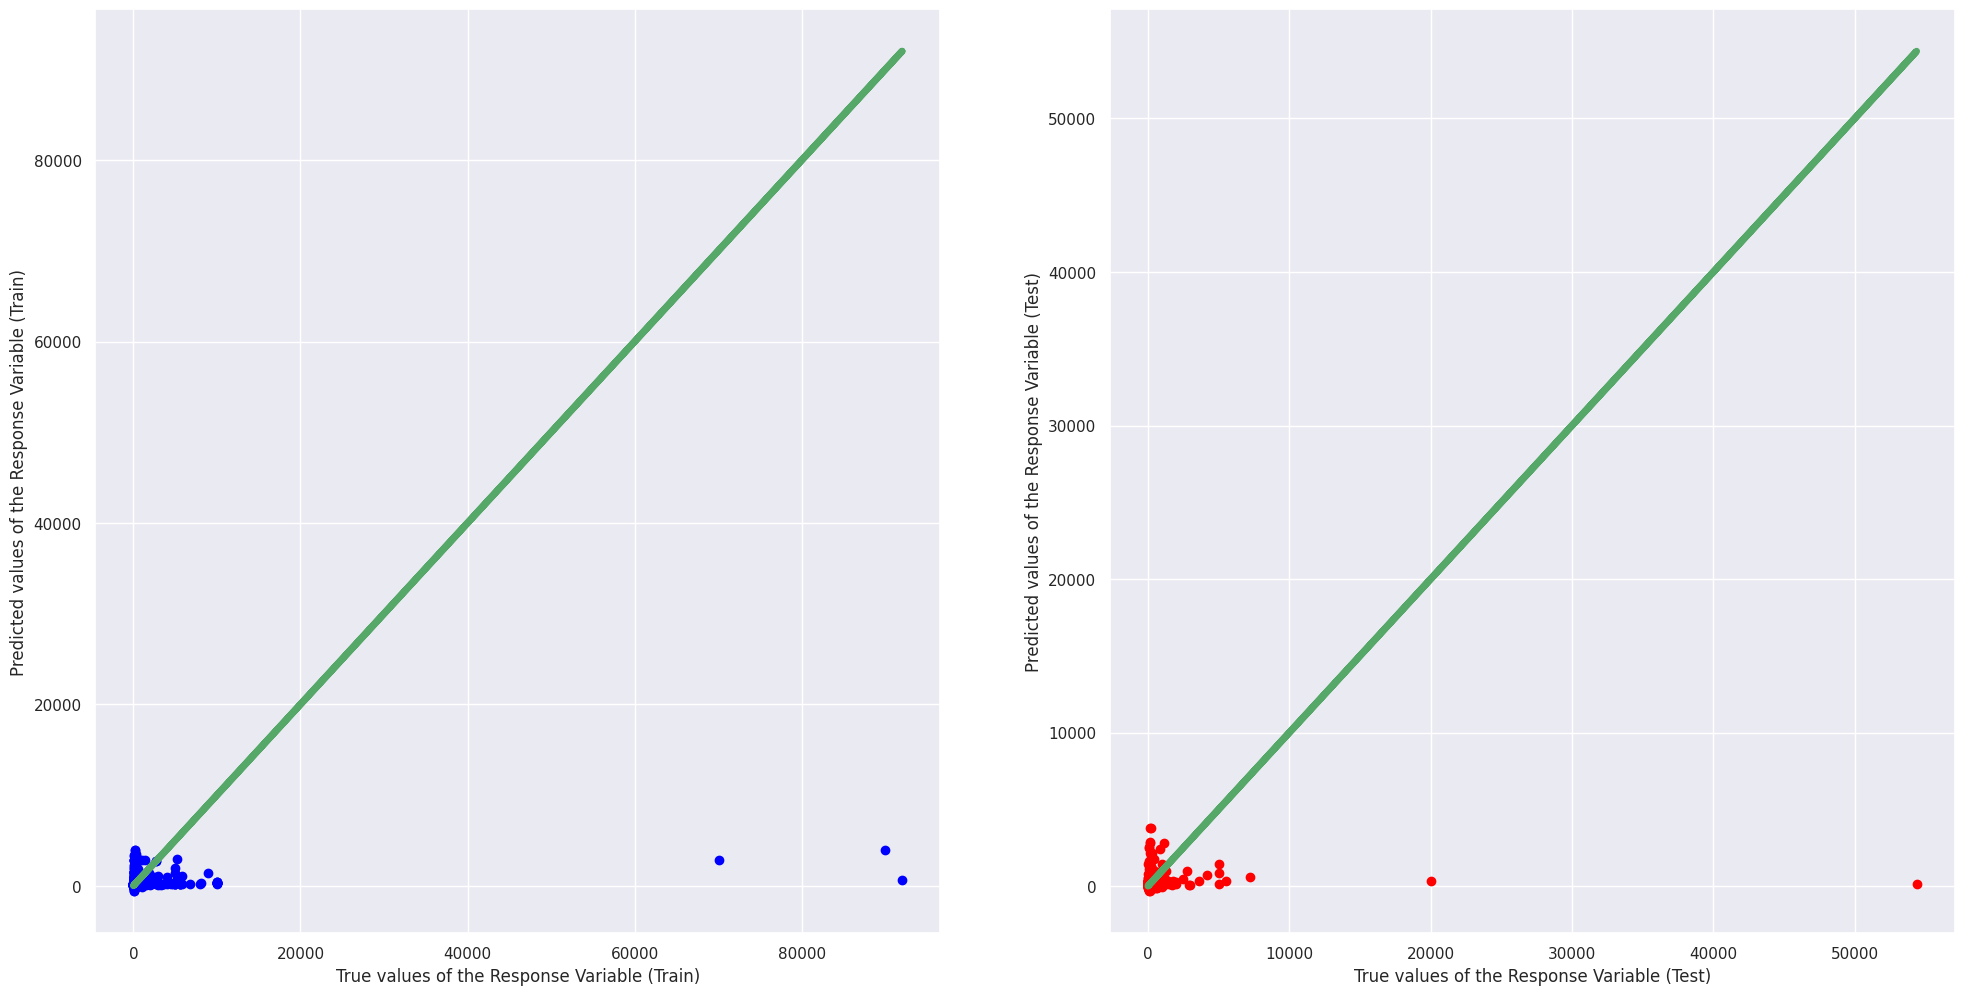

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 6: CatBoost 

CatBoost is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems. 

In [ ]:
# catBoost = CatBoostRegressor()
# parameters = {'depth'         : [3,5],
#                 'learning_rate' : [0.1,0.5],
#                 'iterations'    : [2000]
#                 }
# grid = GridSearchCV(estimator=catBoost, param_grid = parameters, cv = 2, n_jobs=6)
# grid.fit(X_train, y_train)

# print("\n The best parameters across ALL searched params:\n",
#           grid.best_params_)

To optimize the parameters used in the CatBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}

In [ ]:
# Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

# Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1132.5581939	total: 48.3ms	remaining: 1m 36s
1:	learn: 1132.1160886	total: 49.5ms	remaining: 49.4s
2:	learn: 1131.8162948	total: 50.9ms	remaining: 33.9s
3:	learn: 1131.2892693	total: 52.1ms	remaining: 26s
4:	learn: 1131.0124991	total: 55.5ms	remaining: 22.1s
5:	learn: 1130.7140274	total: 57.7ms	remaining: 19.2s
6:	learn: 1130.4816545	total: 59.2ms	remaining: 16.9s
7:	learn: 1130.3622090	total: 64ms	remaining: 15.9s
8:	learn: 1130.1054141	total: 66.1ms	remaining: 14.6s
9:	learn: 1129.8194242	total: 67.1ms	remaining: 13.4s
10:	learn: 1129.6635301	total: 68.3ms	remaining: 12.4s
11:	learn: 1129.4959395	total: 69.5ms	remaining: 11.5s
12:	learn: 1129.3367093	total: 71.3ms	remaining: 10.9s
13:	learn: 1129.0927535	total: 72.5ms	remaining: 10.3s
14:	learn: 1128.9655686	total: 73.7ms	remaining: 9.76s
15:	learn: 1128.8245276	total: 74.9ms	remaining: 9.29s
16:	learn: 1128.6890626	total: 76.2ms	remaining: 8.89s
17:	learn: 1128.5609083	total: 77.4ms	remaining: 8.53s
18:	learn: 1128.4649267

(0.001, 20.0)

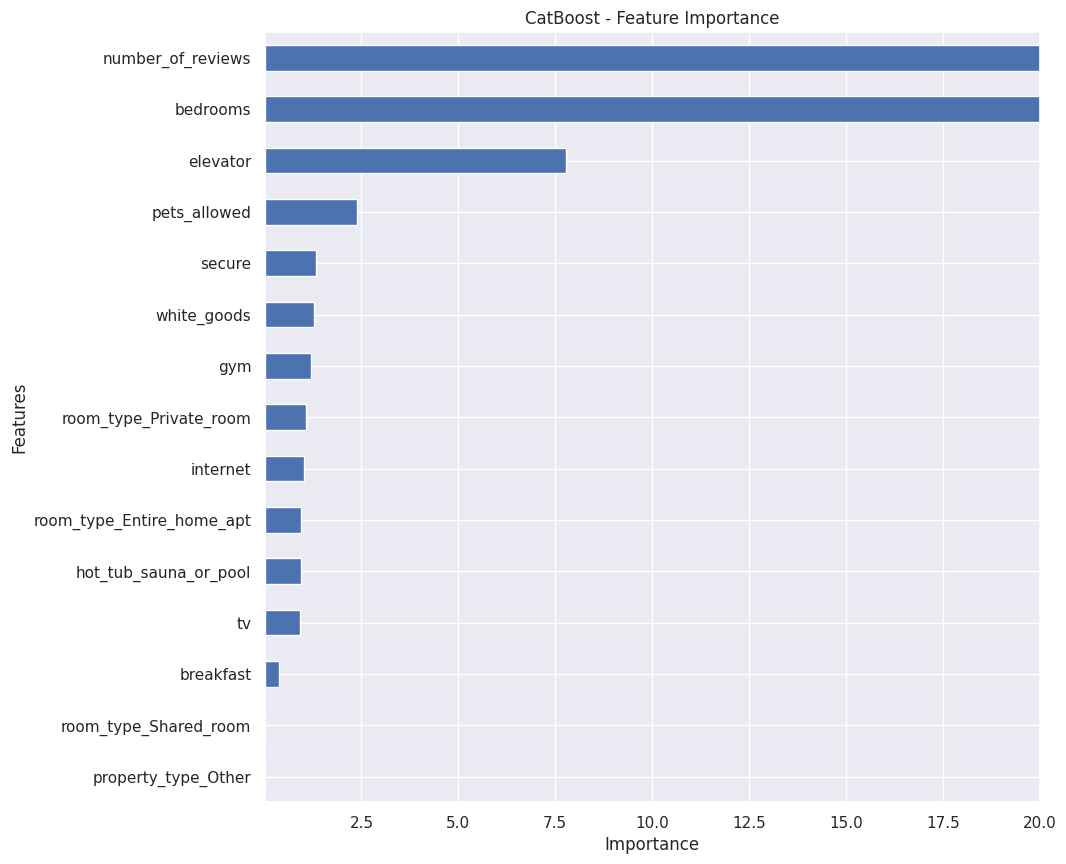

In [ ]:
# Plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');
plt.xlim(0.001, 20.0)

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a longer bar means that the variable has a higher importance in the CatBoost Regression Model in predicting price. 

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

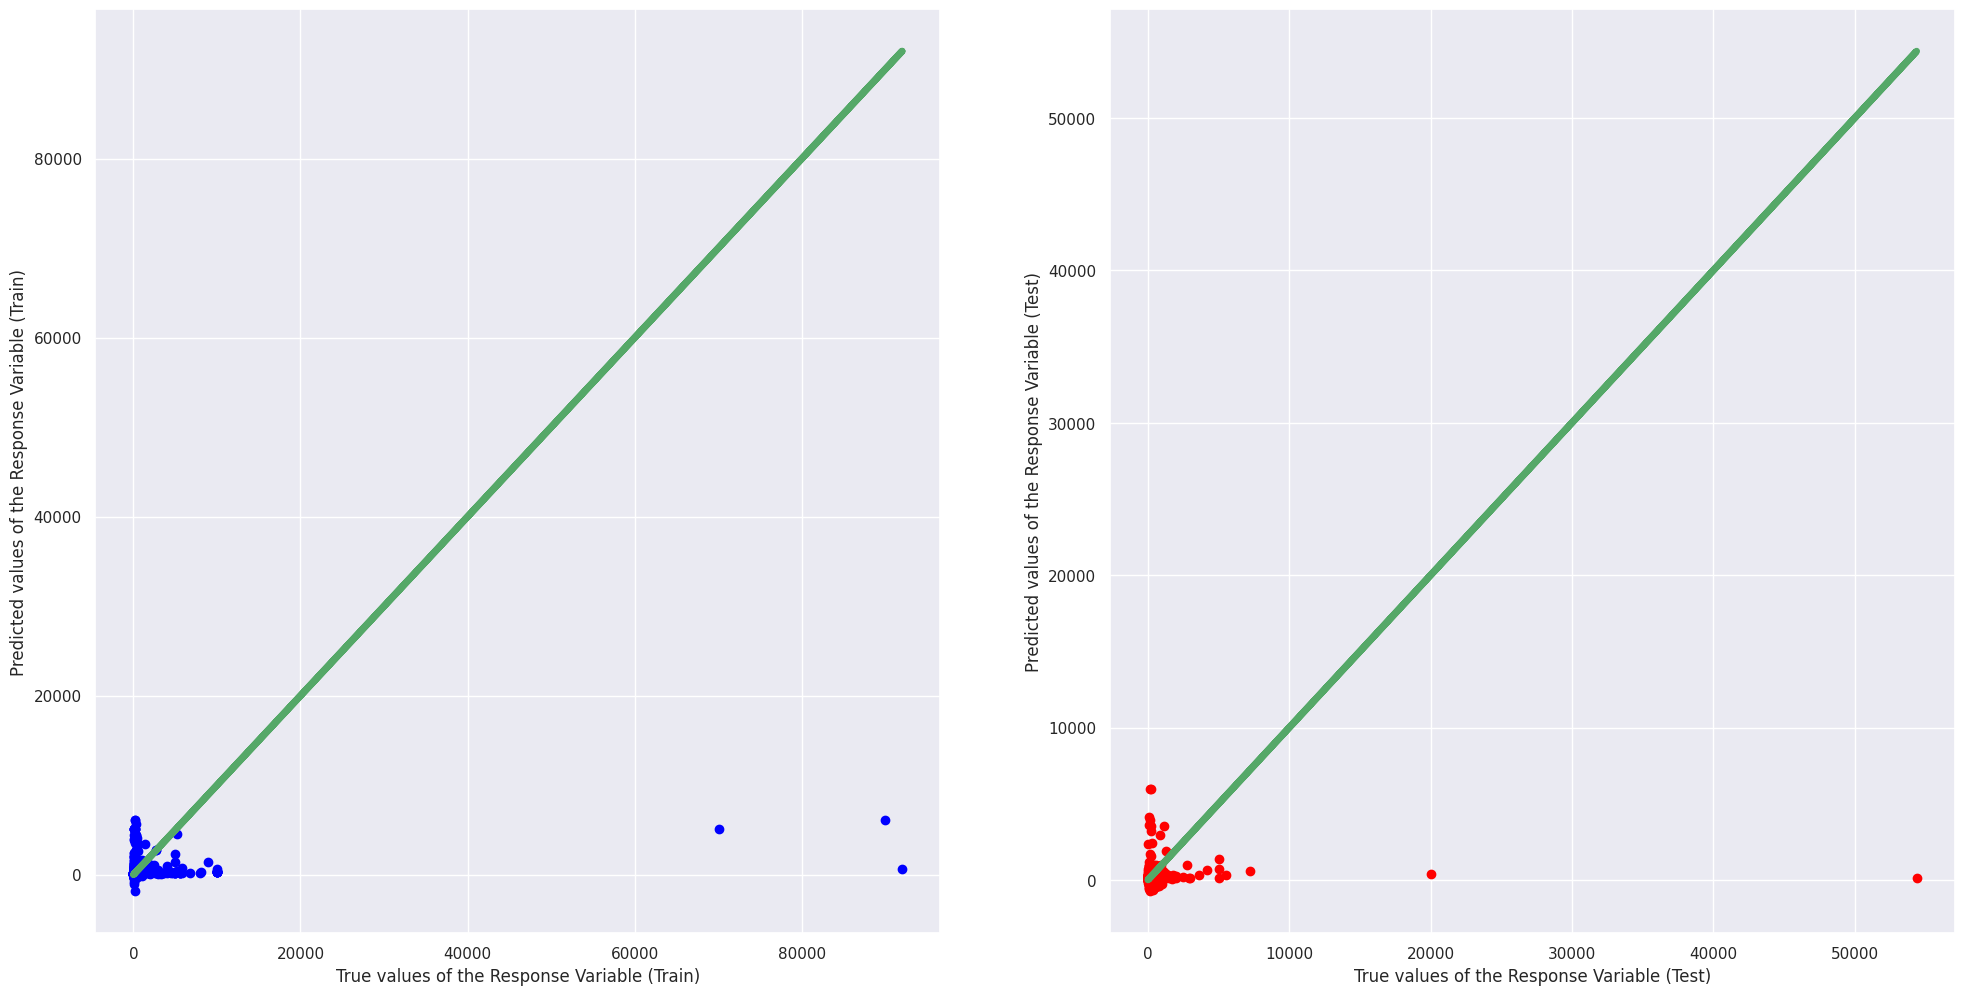

In [ ]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the CatBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Evaluation of Models

#### Train Test Split
Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%. 

In [ ]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))


print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 782881.8967
Linear Regression (R^2): 0.0069

Ridge Regression (MSE): 782881.8967
Ridge Regression (R^2): 0.0069

Lasso Regression (MSE): 782877.5412
Lasso Regression (R^2): 0.0069

Random Forest Regression (MSE): 790433.5806
Random Forest Regression (R^2): -0.0027

XGBoost (MSE): 800785.1704
XGBoost (R^2): -0.0159

CatBoost (MSE): 818812.606
CatBoost (R^2): -0.0387


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.0051
Ridge Regression (R^2): 0.0051
Lasso Regression (R^2): 0.0051
Random Forest Regression (R^2): 0.0675
XGBoost (R^2): 0.0401
CatBoost (R^2): 0.0575


However, Random Train/Test Set Splits may not always be enough as it can be subjected to selection biased during the split process (even if its randomly split). This is especially so if the dataset is small. Train/Test Set Splits can also cause over-fitted predicted models that can also affect its performance metrics. 

As such, to overcome the pitfalls in Train/Test set split evaluation, k-fold Cross Validation is also performed. Here, the whole dataset is used to calcualte the performance of the regression models. This validation method is more popular simply because it generally results in a less biased or less optimistic estimate of the model. 

#### K-fold Cross Validation

K-Fold Cross Validation is where the dataset will be split into k number of folds in which each fold is used as a testing point.

Here, k=10 is used as it is a value that has been found to generally result in a model skill estimate with low bias and a modest variance. 

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, random_state=100, shuffle=True)

scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR = cross_validate(linreg,X,y,cv=kf,scoring=scoring)
results_kfold_Ridge = cross_validate(ridgeReg,X,y,cv=kf,scoring=scoring)
results_kfold_Lasso = cross_validate(lassoReg,X,y,cv=kf,scoring=scoring)
results_kfold_RF = cross_validate(RF,X,y,cv=kf,scoring=scoring)
results_kfold_XGB = cross_validate(xgb_reg,X,y,cv=kf,scoring=scoring)
results_kfold_CatB = cross_validate(CatB,X,y,cv=kf,scoring=scoring)

/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

KeyboardInterrupt: 

In [ ]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()

print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.0164
Ridge Regression R^2: 0.0187
Lasso Regression R^2: 0.0183
Random Forest R^2: -0.0564
XGBooost R^2: -0.1166
CatBoost R^2: -0.3176

Linear Regression MSE: 1179291.3845
Ridge Regression MSE: 1179272.0403
Lasso Regression MSE: 1179505.879
Random Forest MSE: 1196067.1407
XGBooost MSE: 1200362.963
CatBoost MSE: 1226725.297


**Observation**

An interesting observation was that the MSE and R^2 values of the Linear Regression, Ridge Regression and Lasso Regression are very close to each other, this is most probably due to the similarities in the 3 models, as the Ridge and Lasso Regression model are supposed to be an upgraded version of Linear Regression.

### The Most Important Features of a Property Listing

From the evaluation of models, we can see that Random Forest Regression is the best (among all the others) at predicting price. With this information, we do further analysis to find out which feature is the most important. 

We first test out its prediction on a specific instance. Then, using a library called TreeInterpreter, we decompose the Random Forest prediction into a sum of contributions from each feature:

>(Prediction = Bias + Feature1 x Contribution1 + … + FeatureN x ContributionN.) 

This will show us how each individual feature contributed in its prediction based on individual results. A positive result would mean that the feature has a positive impact on the prediction while a negative result shows a negative impact. 

If the prediction of price is fairly accurate (comparing to its true value), then its contributions of individual features would also be deemed fairly reliable.

In [ ]:
from treeinterpreter import treeinterpreter as ti
instance = X.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(RF,instance)

/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/user/.local/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but Deci

In [ ]:
for i in range(len(instance)):
    print("True Value:",trueInstance['price']) 
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

True Value: 1235    70
Name: price, dtype: int64

Prediction: [[157.12181602]]

Feature contributions:
-------------------------
bedrooms 49.0248
number_of_reviews -34.7351
tv -31.4348
room_type_Entire_home_apt 5.4778
pets_allowed -5.4348
breakfast -4.9541
room_type_Private_room 3.4423
elevator -3.3495
white_goods 1.9227
secure -0.7864
hot_tub_sauna_or_pool -0.4592
gym -0.3169
internet 0.2441
room_type_Shared_room 0.1863
property_type_Other 0.0


In this case as seen above, the predicted value of instance 1235 is a very decently good prediction of its true value (150.86 vs 150). As such, if we look at the feature contributions, having amenities such as a hot tub/sauna/pool, gym or elevator is important in influencing price.

To explain why 'bedrooms' has such a negative contribution (even though from previous analysis, it has shown that it is a great impacter), it is because for this particular instance, the bedroom is valued at 0. As such, it can be said that while bedroom is at a negative contribution value, it is still one of the most important feature of a property listing. 

**Conclusion**

From the information above, by comparing the MSE (for test sets) and R^2 (for train sets) of the different models (in which the lower the MSE & higher the R^2 is, the more accurate it is), we can see which regression model is the best at predicting the price of a listing based on room_type, property_type, bedrooms, amenities and number_of_reviews.

As seen from both validation methods, we can see that Random Forest Regression showed the best results, with the highest R^2 value and the lowest MSE value.

The different graphs of True Values VS Predicting Values for each regression model (can be seen under the heading of the different models) can also give us a rough idea on which model is best at predicting. As such, our conclusion above can be said true as the graph of the Random Forest Regression generally has the most number of points situated near the diagonal line.

## Answering the Problem

From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

- Entire properties listed instead of just a single room fetch the highest prices.
- Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
- The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
- There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
- Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
- Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
- The reviews a listing gets (quality or quantity) does not have much of an impact in its price.